# Кредитный скоринг. Probability of Default

## 📌 Описание:
Классическая задача бинарной классификации: предсказать, будет ли заемщик допускать просрочку на 90+ дней в следующие два года.

## 📂 1. Первичная загрузка и анализ данных

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/GiveMeSomeCredit-training.csv')

In [80]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


## 🧹 2. EDA и предобработка

## Проверка пропущенных значений

In [83]:
# Кол-во пропусков
print(f'Пропущенные значения по колонкам:\n{df.isna().sum().sort_values(ascending=False)}')

Пропущенные значения по колонкам:
MonthlyIncome                           29731
NumberOfDependents                       3924
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
age                                         0
RevolvingUtilizationOfUnsecuredLines        0
DebtRatio                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
dtype: int64


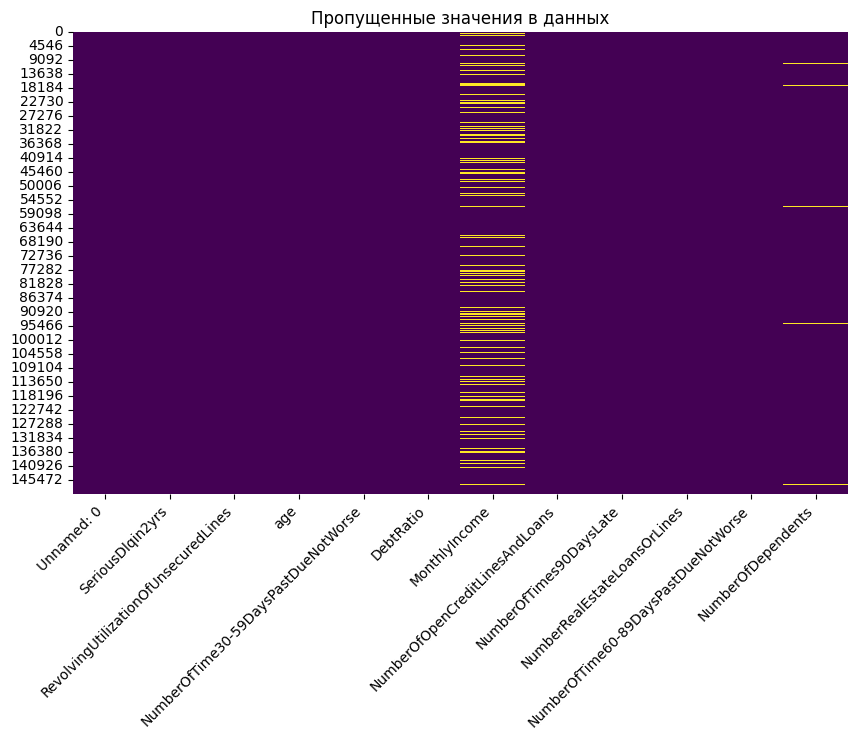

In [84]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Пропущенные значения в данных")
plt.xticks(rotation=45, ha='right')
plt.show()

In [85]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

## Проверка выбросов и подозрительных значений

In [86]:
# Проверка на несовершенолетних
df[df['age'] < 18]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [87]:
# Смотрим есть задолженность больше лимита
df[df['RevolvingUtilizationOfUnsecuredLines'] > 1]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
162,163,1,1.046279,47,1,1.104301,5416.0,6,0,2,0,1.0
191,192,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
226,227,1,1.953488,38,0,0.153500,3556.0,5,0,0,0,2.0
251,252,1,1.048211,58,7,0.151957,3500.0,12,0,0,0,0.0
293,294,0,2340.000000,45,0,0.339333,8333.0,7,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149939,149940,0,1.049900,26,0,0.073220,6500.0,6,0,0,1,0.0
149955,149956,1,1.135552,41,2,0.845887,7500.0,12,0,4,1,0.0
149962,149963,0,1.005733,48,0,0.248896,2944.0,4,3,0,0,1.0
149964,149965,0,1.010934,63,0,0.608211,6015.0,8,0,1,0,0.0


In [88]:
# Выброс, возможно деление на 0
df[df['DebtRatio'] > 1000]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
16,17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
44,45,0,0.368876,68,0,1687.5,1.0,31,0,1,0,0.0
50,51,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
58,59,0,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149953,149954,0,0.231488,41,0,1198.0,NaN,3,0,1,0,0.0
149958,149959,0,0.457101,63,0,4945.0,NaN,9,0,1,0,0.0
149975,149976,0,0.022088,58,0,2716.0,NaN,8,0,2,0,0.0
149992,149993,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


Обработаем выбросы и аномалии

In [89]:
# Минимальный возраст — 18 лет 
df = df[df['age'] >= 18]

# Удаляем экстримы в DebtRatio
df = df[df['DebtRatio'] < 10000]

# Удаляем значения, где Utilization > 10
df = df[df['RevolvingUtilizationOfUnsecuredLines'] <= 10]

In [90]:
# Заполнение пропусков
df.fillna({'MonthlyIncome': df['MonthlyIncome'].median(), 'NumberOfDependents': 0}, inplace=True)

Выявим процент клиентов в дефолте

In [91]:
df['SeriousDlqin2yrs'].mean()

np.float64(0.06678745010997533)

## Корреляции с целевой переменной

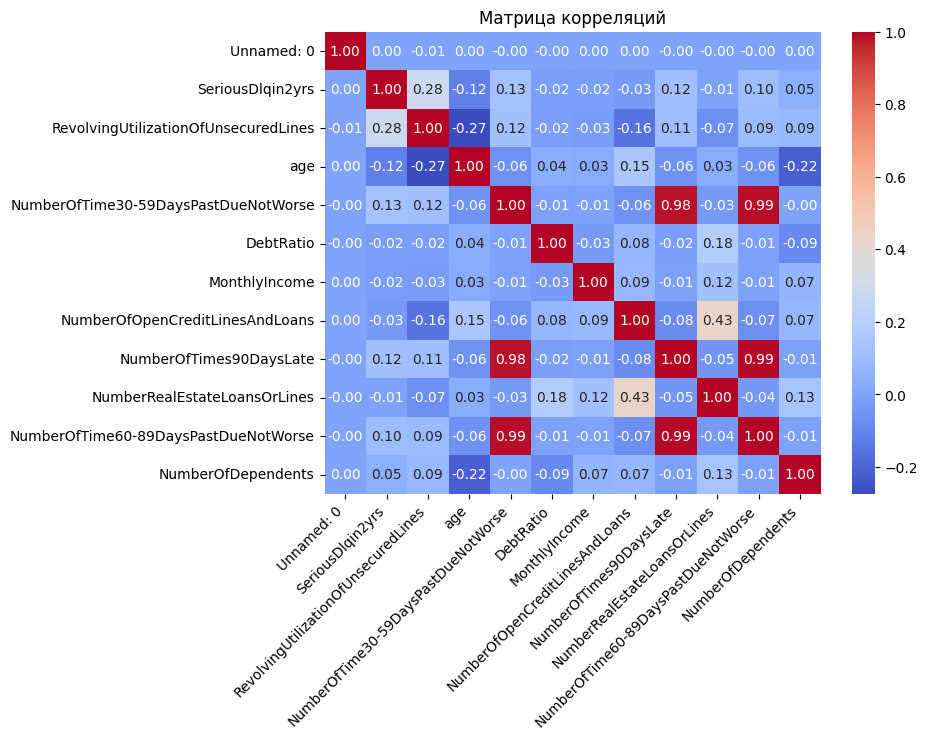

In [92]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляций")
plt.xticks(rotation=45, ha='right')
plt.show()

Слабая связь с SeriousDlqin2yrs (<0.2):
- NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTimes90DaysLate
- NumberOfTime60-89DaysPastDueNotWorse
- age

Три переменные с просрочками (delinquencies) — основные сигналы риска. Остальные — слабые.
Очень сильная между переменными просрочек.

Это означает, что они почти дублируют друг друга, и в модели нужно оставить только один, либо сделать агрегатный признак.

In [93]:
df['TotalDelinquencies'] = (
    df['NumberOfTimes90DaysLate'] +
    df['NumberOfTime30-59DaysPastDueNotWorse'] +
    df['NumberOfTime60-89DaysPastDueNotWorse']
)

## Генерация новых признаков

Добавим новый столб DebtRatio_bin, который разобьем на категории low, medium, high

In [94]:
df['DebtRatio_bin'] = pd.cut(df['DebtRatio'], bins=[-1, 0.2, 0.5, 1, 10000], labels=['Low', 'Med', 'High', 'Extreme'])
df[['DebtRatio_bin']]

,DebtRatio_bin
0,High
1,Low
2,Low
3,Low
4,Low
...,...
149995,Med
149996,High
149997,Extreme
149998,Low


### Доход

Сглаживает распределение для MonthlyIncome.	Улучшает линейные модели.

In [95]:
df['log_income'] = np.log1p(df['MonthlyIncome'])
df[['log_income']]

,log_income
0,9.118335
1,7.863651
2,8.020599
3,8.101981
4,11.060196
...,...
149995,7.650169
149996,8.627840
149997,8.594339
149998,8.651199


In [96]:
df['IncomePerPerson'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)
df[['IncomePerPerson']]

,IncomePerPerson
0,3040.000000
1,1300.000000
2,3042.000000
3,3300.000000
4,63588.000000
...,...
149995,2100.000000
149996,1861.333333
149997,5400.000000
149998,5716.000000


### Долговая нагрузка

In [97]:
df['DebtPerLoan'] = df['DebtRatio'] / (df['NumberOfOpenCreditLinesAndLoans'] + 1)
df[['DebtPerLoan']]

,DebtPerLoan
0,0.057356
1,0.024375
2,0.028371
3,0.006008
4,0.003116
...,...
149995,0.045026
149996,0.143312
149997,203.684211
149998,0.000000


In [98]:
df['DebtPerPerson'] = df['DebtRatio'] / (df['NumberOfDependents'] + 1)
df[['DebtPerPerson']]

,DebtPerPerson
0,0.267661
1,0.060938
2,0.085113
3,0.036050
4,0.024926
...,...
149995,0.225131
149996,0.238854
149997,3870.000000
149998,0.000000


### Просрочки

In [99]:
df['HasAnyDelinquency'] = (df['TotalDelinquencies'] > 0).astype(int)
df[['HasAnyDelinquency']]

,HasAnyDelinquency
0,1
1,0
2,1
3,0
4,1
...,...
149995,0
149996,0
149997,0
149998,0


In [100]:
df['DelinqPerLoan'] = df['TotalDelinquencies'] / (df['NumberOfOpenCreditLinesAndLoans'] + 1)
df[['DelinqPerLoan']]

,DelinqPerLoan
0,0.142857
1,0.000000
2,0.666667
3,0.000000
4,0.125000
...,...
149995,0.000000
149996,0.000000
149997,0.000000
149998,0.000000


### Превышение лимита

In [101]:
df['UtilOverLimit'] = (df['RevolvingUtilizationOfUnsecuredLines'] > 1).astype(int)
df[['UtilOverLimit']]

,UtilOverLimit
0,0
1,0
2,0
3,0
4,0
...,...
149995,0
149996,0
149997,0
149998,0


In [102]:
df['log_utilization'] = np.log1p(df['RevolvingUtilizationOfUnsecuredLines'])
df[['log_utilization']]

,log_utilization
0,0.568789
1,0.671490
2,0.505721
3,0.210107
4,0.645657
...,...
149995,0.039868
149996,0.262168
149997,0.219974
149998,0.000000


### Теперь у нас расширенный датасет с новыми столбцами:

Они более устойчивые, информативные, и позволяют:
- улучшить интерпретируемость
- убрать мультиколлинеарность
- сделать модель explainable

## Обучение базовой модели (логистическая регрессия)

### Цель: построить первую ML-модель, которая предсказывает вероятность дефолта (SeriousDlqin2yrs), и понять её поведение.

### Подготовка данных:

Очистим и подготовим тестируемый датасет

In [103]:
test_df = pd.read_csv('data/GiveMeSomeCredit-testing.csv')

In [104]:
def preprocess(df):
    df = df.copy()
    df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
    df['NumberOfDependents'] = df['NumberOfDependents'].fillna(0)
    
    df['log_income'] = np.log1p(df['MonthlyIncome'])
    df['IncomePerPerson'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)
    df['DebtPerLoan'] = df['DebtRatio'] / (df['NumberOfOpenCreditLinesAndLoans'] + 1)
    df['DebtPerPerson'] = df['DebtRatio'] / (df['NumberOfDependents'] + 1)
    
    df['TotalDelinquencies'] = (
        df['NumberOfTimes90DaysLate'] +
        df['NumberOfTime30-59DaysPastDueNotWorse'] +
        df['NumberOfTime60-89DaysPastDueNotWorse']
    )
    df['HasAnyDelinquency'] = (df['TotalDelinquencies'] > 0).astype(int)
    df['DelinqPerLoan'] = df['TotalDelinquencies'] / (df['NumberOfOpenCreditLinesAndLoans'] + 1)
    
    df['UtilOverLimit'] = (df['RevolvingUtilizationOfUnsecuredLines'] > 1).astype(int)
    df['log_utilization'] = np.log1p(df['RevolvingUtilizationOfUnsecuredLines'])

    return df
test_df = preprocess(test_df)

### Обучаем модель только на train_df

In [105]:
features = [
    'log_income',
    'IncomePerPerson',
    'DebtPerLoan',
    'DebtPerPerson',
    'TotalDelinquencies',
    'DelinqPerLoan',
    'HasAnyDelinquency',
    'UtilOverLimit',
    'log_utilization',
    'age'
]

target = 'SeriousDlqin2yrs'
X_train = df[features]
y_train = df['SeriousDlqin2yrs']

Сделаем кросс-валидацию внутри train (через cross_val_score, StratifiedKFold)

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=5000))
])

scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')
print("CV ROC AUC:", scores.mean())

CV ROC AUC: 0.851219871075186


С вероятностью 85.1% наша модель отдаёт большее значение предсказанной вероятности дефолта дефолтному клиенту, чем не-дефолтному.

In [107]:
pipe.fit(X_train, y_train)  # обучаем на всех данных

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


### Предсказываем на test_df

In [108]:
X_test = test_df[features]
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

### Формируем результат

In [109]:
submission = pd.DataFrame({
    'Id': test_df.index,
    'Probability': y_pred_proba
})

submission.to_csv('submission.csv', index=False)